# Initial Machine Learning
> This notebook contains some beginning machine learning work for some preliminary analysis.

In [ ]:
#| default_exp regression

In [ ]:
#| hide
from nbdev.showdoc import *

## Import Libraries

In [ ]:
#| export
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

df_pheno = pd.read_pickle('../data/proc/pheno_eng.pkl')

In [ ]:
df_pheno.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878 entries, 0 to 2103
Data columns (total 60 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   RecId                            1878 non-null   object        
 1   DonId                            1878 non-null   object        
 2   GraftSurvivalDays                1878 non-null   int64         
 3   GraftCensored                    1878 non-null   int64         
 4   RecAge                           1878 non-null   int64         
 5   DonAge                           1878 non-null   int64         
 6   RecSex                           1878 non-null   category      
 7   DonSex                           1878 non-null   category      
 8   GraftNo                          1878 non-null   int64         
 9   PrimaryRenalDisease              1878 non-null   category      
 10  HasDiabetes                      1878 non-null   bool       

### Simple Linear Regression Prediction Model

#### eGFR 1 Year

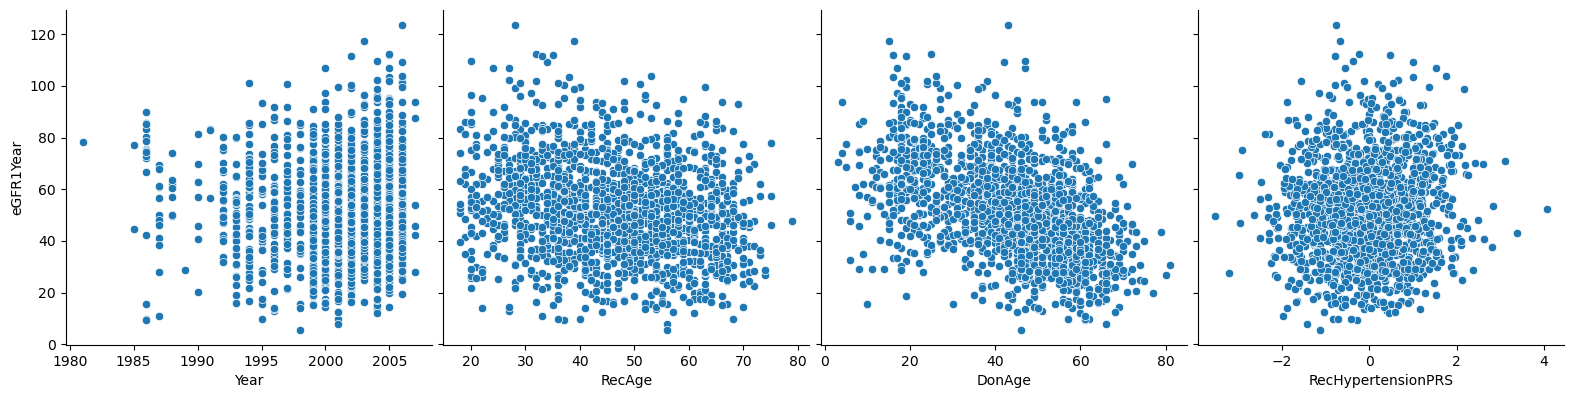

In [ ]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(df_pheno, x_vars=['Year', 'RecAge', 'DonAge', 'RecHypertensionPRS', ], 
             y_vars='eGFR1Year', height=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
df_pheno.columns

Index(['RecId', 'DonId', 'GraftSurvivalDays', 'GraftCensored', 'RecAge',
       'DonAge', 'RecSex', 'DonSex', 'GraftNo', 'PrimaryRenalDisease',
       'HasDiabetes', 'eGFR1Year', 'eGFR5Year', 'RecPC1', 'RecPC2', 'RecPC3',
       'DonPC1', 'DonPC2', 'DonPC3', 'RecHypertensionPRS',
       'DonHypertensionPRS', 'RecAlbuminuriaPRS', 'DonAlbuminuriaPRS',
       'ReceGFRPRS', 'DoneGFRPRS', 'ReceGFRDeltaPRS', 'DoneGFRDeltaPRS',
       'RecStrokePRS', 'DonStrokePRS', 'RecIAPRS', 'DonIAPRS', 'RecHAKVPRS',
       'DonHAKVPRS', 'RecPKDPRS', 'DonPKDPRS', 'RecKVPRS', 'DonKVPRS',
       'GraftDate', 'GraftType', 'OnDialysis',
       'HasPregnancyInducedHypertension', 'DonType', 'HLAMismatches',
       'ColdIschemiaTime', 'RecSex_num', 'DonSex_num',
       'PrimaryRenalDisease_num', 'GraftType_num', 'AgeDifference',
       'SexMismatch', 'Year', 'Month', 'Day', 'Season', 'Season_num',
       'DonAge_sqrd', 'RecAge_sqrd', 'HLAMismatches_sqrd',
       'AgeDifference_sqrd', 'DonAge_X_RecAge'],
      dty

In [ ]:
#| export
def overview():
    x = df_pheno.dropna(subset=['eGFR1Year']).drop([
        'RecId', 'DonId', 'GraftSurvivalDays', 'GraftCensored', 'RecSex_num', 'DonSex_num', 
        'PrimaryRenalDisease', 'GraftDate', 'eGFR1Year', 'eGFR5Year', 'GraftType_num', 'Season_num',
    ], axis=1)
    y = df_pheno.dropna(subset=['eGFR1Year'])['eGFR1Year']

    for col in x.columns:
        results = smf.ols(f"eGFR1Year ~ {col}", data=df_pheno).fit()
        print('_' * 50)
        print(' ' * 20, col)
        print('_' * 50)
        for t in results.pvalues.index:
            print(f'{t} is{" not" if results.pvalues[t] > 0.05 else ""} significant with a coefficient {round(results.params[t],5)} and a p-value of {round(results.pvalues[t],5)}')
    
overview()

__________________________________________________
                     RecAge
__________________________________________________
Intercept is significant with a coefficient 65.69527 and a p-value of 0.0
RecAge is significant with a coefficient -0.30319 and a p-value of 0.0
__________________________________________________
                     DonAge
__________________________________________________
Intercept is significant with a coefficient 76.83584 and a p-value of 0.0
DonAge is significant with a coefficient -0.57824 and a p-value of 0.0
__________________________________________________
                     RecSex
__________________________________________________
Intercept is significant with a coefficient 52.72869 and a p-value of 0.0
RecSex[T.Female] is significant with a coefficient -2.87157 and a p-value of 0.00276
__________________________________________________
                     DonSex
__________________________________________________
Intercept is significant with a

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()